In [2478]:
import random
import matplotlib.pyplot as plt
pool = ['0','1']
start_of_binary_string = '0b'
func = lambda x,y: int(((x & y) + y)/(x | y + 3)) ^ (x * y) * 3

In [2479]:
def f(a, b):
    return func(eval(start_of_binary_string + a),eval(start_of_binary_string + b))

In [2480]:
# вспомогательная функция
def help(a, b, m):
    # приводим к целым числам
    # применяем функцию
    # возвращаем в строковое представление число для получения бинарной строки m последних справа разрядов
    return (bin(f(a, b)).replace(start_of_binary_string, ''))[-m:]

In [2481]:
def H(a, h, m):
    return help(a, h, m)

In [2482]:
def fill_zeros(w, m):
    if len(w) % m !=0:
        return w.zfill(len(w) + (m - (len(w) % m)))
    else:
        return w

In [2483]:
def hash(h0, w, m):
    h = [h0]
    w = fill_zeros(w, m)[::-1]
    iters = int(len(w) / m)
    for i in range(iters):
        h.append(H(w[i * m:(i*m + m)][::-1], h[-1], m))
    return h[-1]
    

In [2484]:
def random_binary_string(m):
    return ''.join(random.choices(pool, k=m))

In [2485]:
def to_I(array, m):
    return [(eval('0b' + i) % (2 ** m)) / (2 ** m) for i in array]

In [2486]:
def automata_projection(h0, m):
    x = [random_binary_string(5 * m)]
    y = [hash(h0, x[-1], m)]
    for _ in range(2 ** m - 1):
        calc = hash(h0, y[-1], m)
        y.append(calc)
        x.append(y[-1])
    x = to_I(x, m)
    y = to_I(y, m)
    print(x[0])
    return plt.scatter(x, y)

In [2487]:

len_w = 19
w = '1011111101111011101'
m = 4
h0 = '0101'
hash(h0, w, 4)


'1111'

0.625


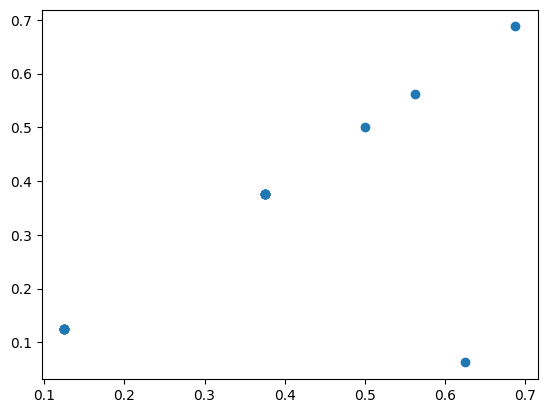

In [2488]:
automata_projection('1001', 4)